# Imports

In [14]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

np.random.seed(1234)

In [ ]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

# sns.set()

# Overview - NN for Vision Systems

A convolutional neural network (CNN) is an algorithm that processes deep learning input images by assigning importance to weights and biases for various aspects and objects in the images. Then, it works to distinguish the input images from one another. A CNN is built similarly to the connectivity pattern of neurons in the human brain and is based on the organization of the visual cortex. An individual neuron responds to stimuli only in a limited visual field region, known as the receptive field. The receptive field overlaps with the visual field, covering it entirely. 

CNNs perform better with image, speech, or audio inputs than other neural networks. There are three main layers in CNNs:
- Convolutional layer
- Pooling layer
- Fully connected (FC) layer

# 23.1 Convolutional NN

Before CNN, consider a basic non convolutional approach to NN and image classification
- Vectorize the image by concatenating every row together
- Then pass to 1 or more dense layers
- Finish with a softmax to get a probability per class

While this work pretty well for simpler images, it doesn't make a lot of intuitive sense
- why destroy the visual arrangement in a 2d image by vectorizing it as shown below

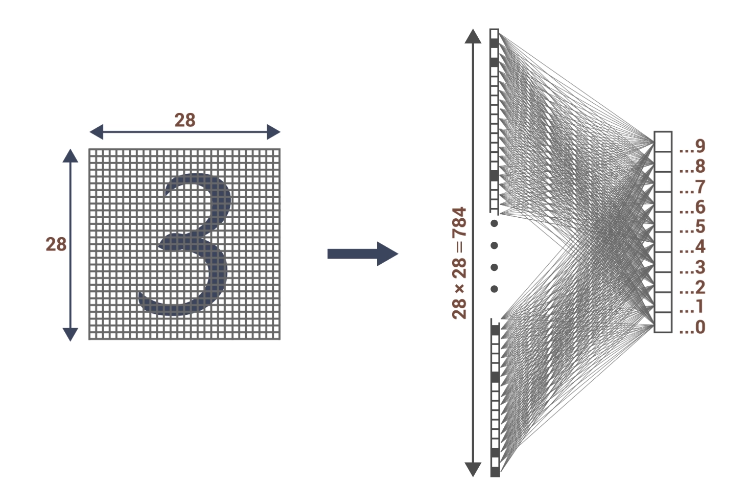

Some properties of natural images that make a vectorization of them ill-advised, they are
- Spatially correlated
    - If a block of pixels is white, its likely that an interior pixel in that block is also white
- Composed of a heirarchical structure
    - Images tend to be built of smaller building blocks that can be reused (i.e. reappear) elsewhere in the image
- Translationally invariant
    - An image of a cat is still a cat, even if you slide it up or down, left or right

So what is desirable is a type of NN that preserves / recognizes / makes use of these properties
- A CNN does this

Reviewing convolution
- Given an MxN image chip
- Pointwise multiply with a kernel matched to the size of the image chip
- Sum the result
- Add a bias
- And invoke an activation function
- Together this maps the chip to a scalar value, which is the output of the filter for the center pixel of the chip

To form the full output, apply the filter in a sliding fashion across the entire image
- The filtered image can be called a feature map

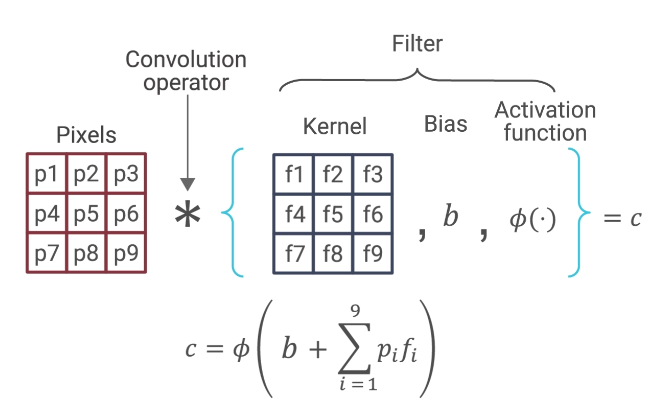

Doing a convolution example for a sample chip and random kernel

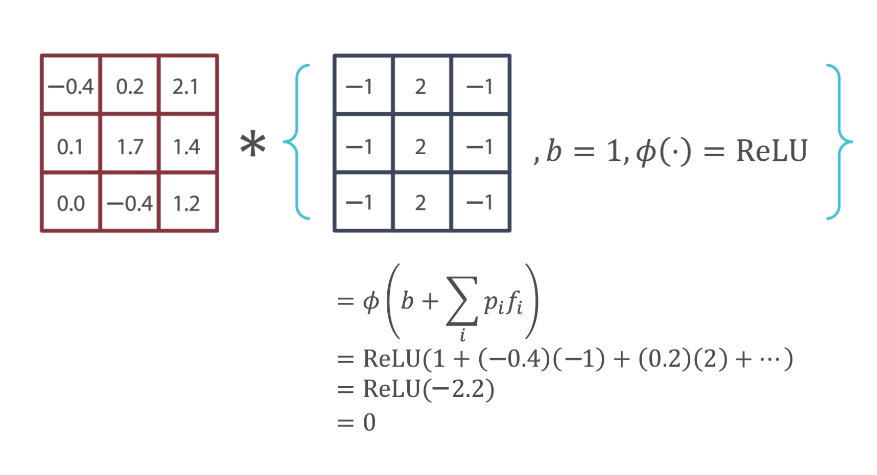

Some filtering options
- since the filter would overhang the image support if applied cenetered on the upper left pixel
    - it is truncated and only applied so that the kernel has full support
    - this crops the size of the image by about half the size of the kernel
    - you can recover the sizing by padding the output with a border of zeros (in keras, set pad = True)
- Additionally, you can stride by a value larger than 1
    - a stride of 2 would recompute the convolution on every other pixel center
    - the feature map is then chopped in half in both dims

Putting together the CNN
- Apply 1 or more filter kernels
- Generates 1 or more feature maps
- Reduce each feature map with a pooling layer
    - An example pooling layer is a max pool
    - Take the neighborhood max for a programmable neighborhood size
- The output of these 2 steps is now N deep, x the 2-d dims per pooled feature map
- Now repeat the above steps, but now need an N-deep kernel set
- After as many steps as you want, you have a highly reduced set
- Vectorize that, and apply softmax

Conceptually, consider the steps prior to the final vectorization and softmax as learning a new set of features
- Then that final feature set is subject to an ordinary multinomial logistic regression

Notice that at no point was it necessary to identify what features to look for
- These were learned by the backpropagation stages in the NN

# 23.2 NN for Vision, Part 1

Problem setup is making a classifier for identifying what number, from 0-9, has been written in a 28x28 pixel image
- A dense layer CNN (vectorize and classify as shown above in the what not to do content) can do pretty well, getting about 97% test accuracy
- Review how the setup would look in keras
    - The code snippet shows 2 different ways, both valid, to build the model
        - using sequential API
        - or using by manually setting each prior output as input to next layer

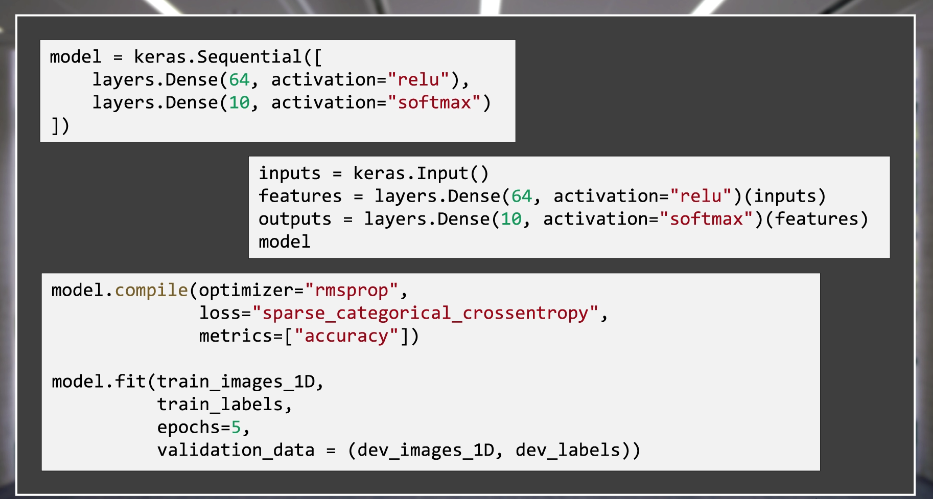

Sample results from running the above model on the MNIST data set
- Not too shabby, but a CNN can be even better

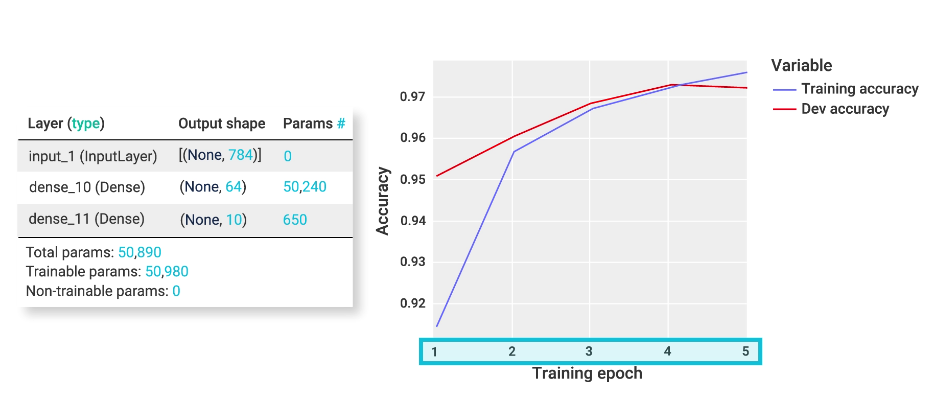

Now look at some code to setup the CNN

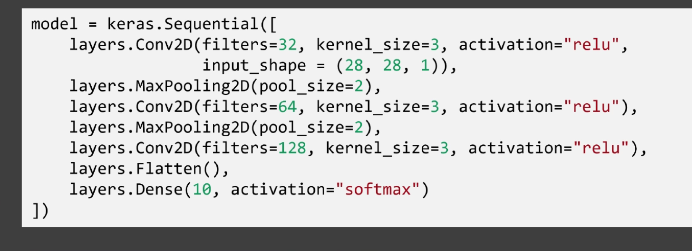

And look at some parameter counts
- Why 320 parameters for layer 1?
    - 32 filters, each of which is 3x3 + 1 or 32 x 10 = 320
- Why is filter 2 18,496 parameters?
    - 64 filters of 10 params each, times the 320 prior parameters, reduced via max pool by 2
        - 64 x 10 x 320 / 2

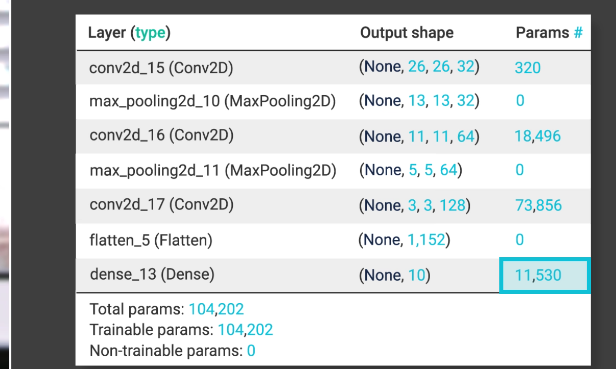

In [26]:
(18496/64 - 1)/12/12

2.0

In [28]:
(320/32 - 1)/3/3

1.0

Looking at the resulting NN
- use keras.utils, not keras.utils.vis_utils, for current keras versions

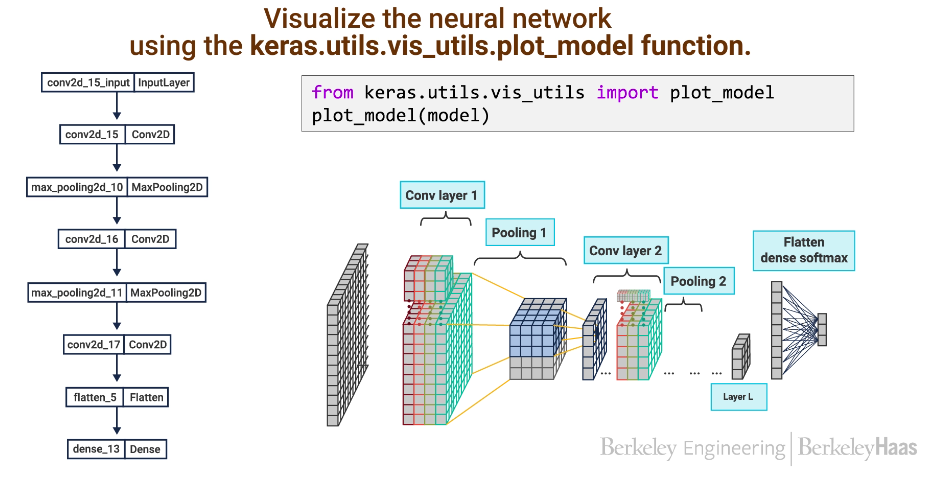